<a href="https://colab.research.google.com/github/josehumbertodearaujo/case_american_housing/blob/main/Primeiro_modelo_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [3]:
base_casa = pd.read_csv('USA_Housing.csv', sep=',')

In [4]:
base_casa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
def renomear_colunas(df):
  '''
  Função para renomear as columas
  Retira os pontos dos nomes das columas
  Troca os espaços por underline.
  Troca as letras maiúsculas por minúsculas
  '''
  df.columns = df.columns.str.replace('.','').str.lower()
  df.columns = df.columns.str.replace(' ','_').str.lower()
  return df

base_casa = renomear_colunas(base_casa)
base_casa.head()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price,address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [28]:
base_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_area_income              5000 non-null   float64
 1   avg_area_house_age           5000 non-null   float64
 2   avg_area_number_of_rooms     5000 non-null   float64
 3   avg_area_number_of_bedrooms  5000 non-null   float64
 4   area_population              5000 non-null   float64
 5   price                        5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [6]:
base_casa.describe()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
fig = px.box(base_casa, x = "avg_area_income")
fig.show()

In [8]:
fig = px.box(base_casa, x = "price")
fig.show()

In [9]:
#Vamos realizar uma regressão linear. Para isso, vamos remover a coluna "Address".

base_casa = base_casa.drop(['address'], axis=1)
base_casa.head()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


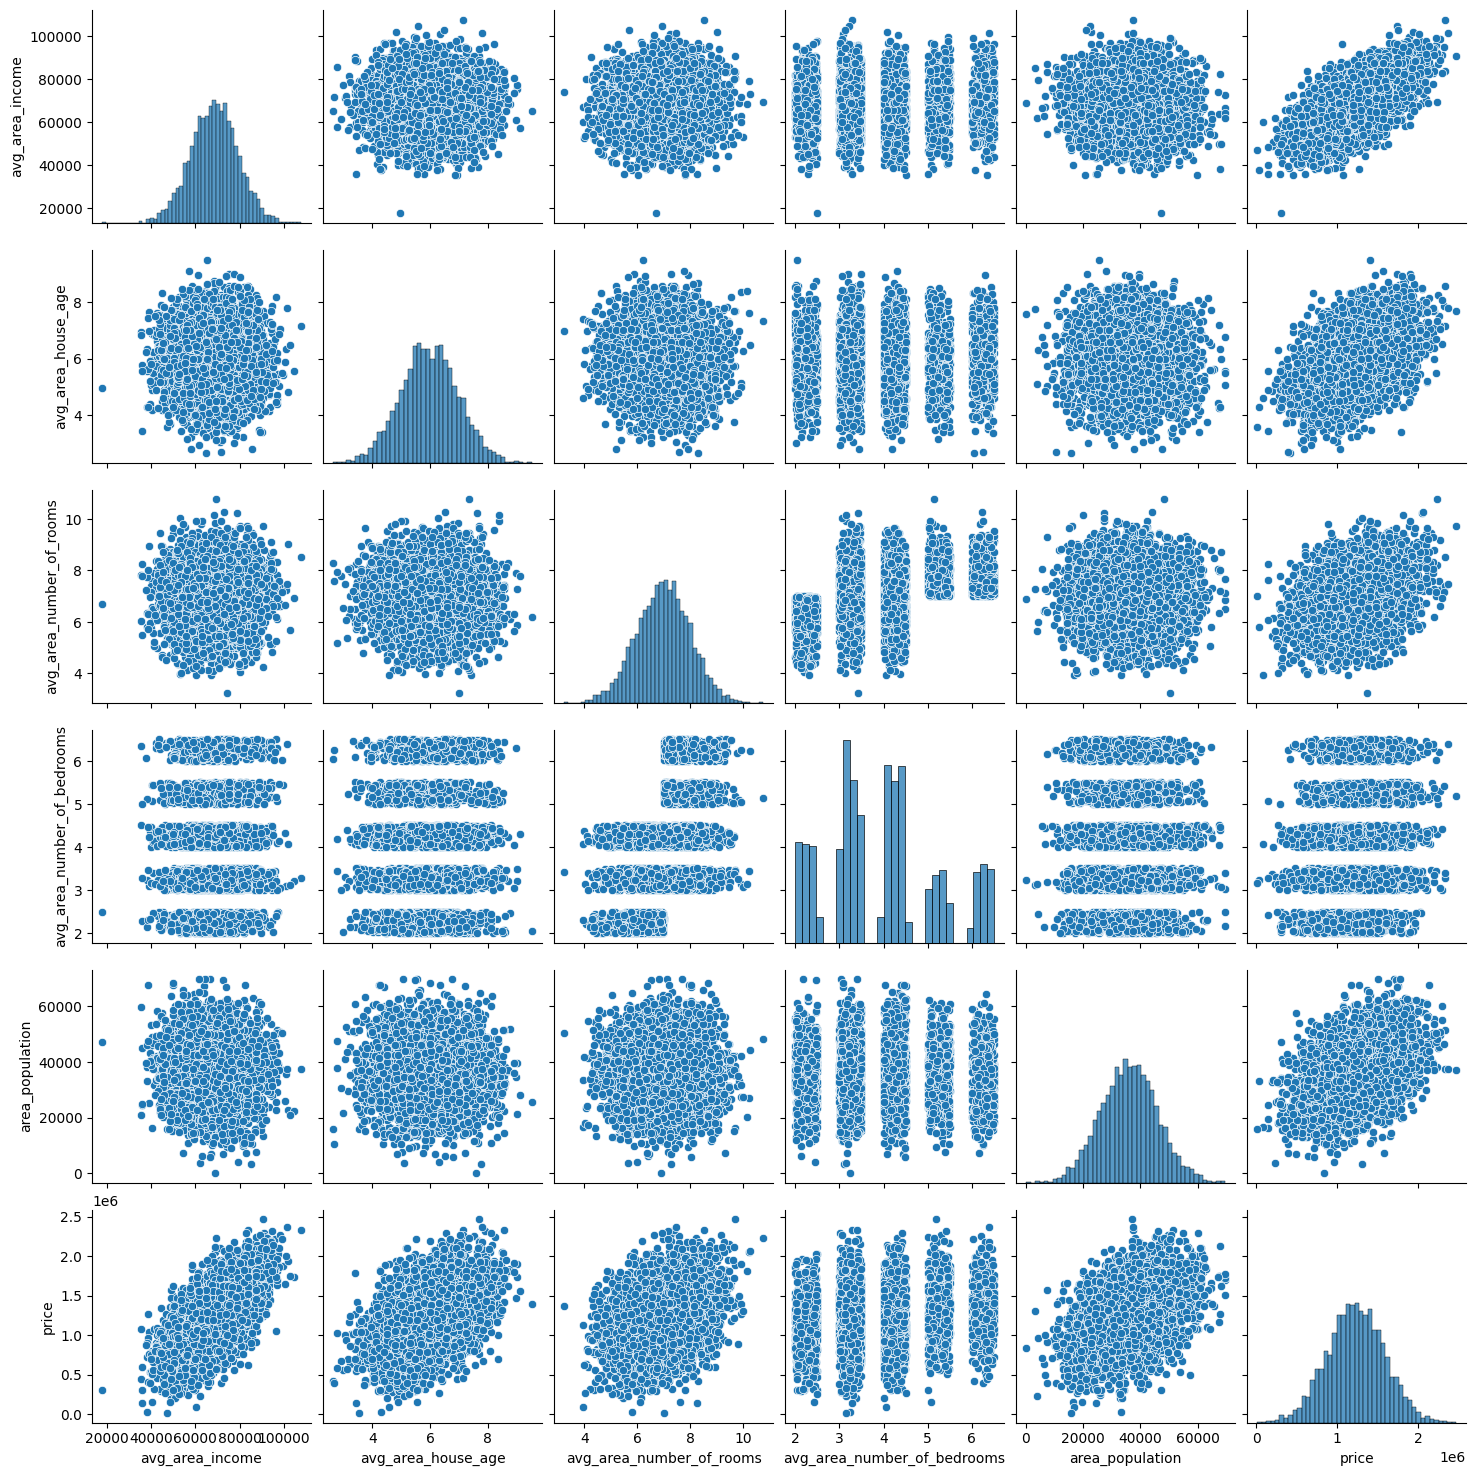

In [10]:
sns.pairplot(base_casa)

In [11]:
base_casa.columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population', 'price'],
      dtype='object')

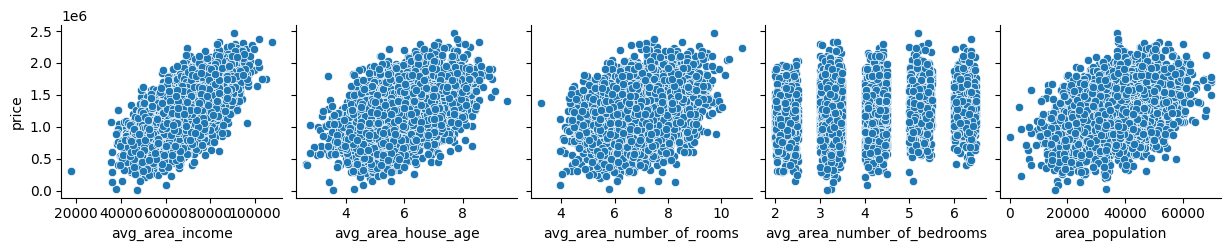

In [12]:
sns.pairplot(base_casa, x_vars = ['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population'], y_vars = 'price')

In [13]:
base_casa.corr()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price
avg_area_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
avg_area_house_age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
avg_area_number_of_rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
avg_area_number_of_bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
area_population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

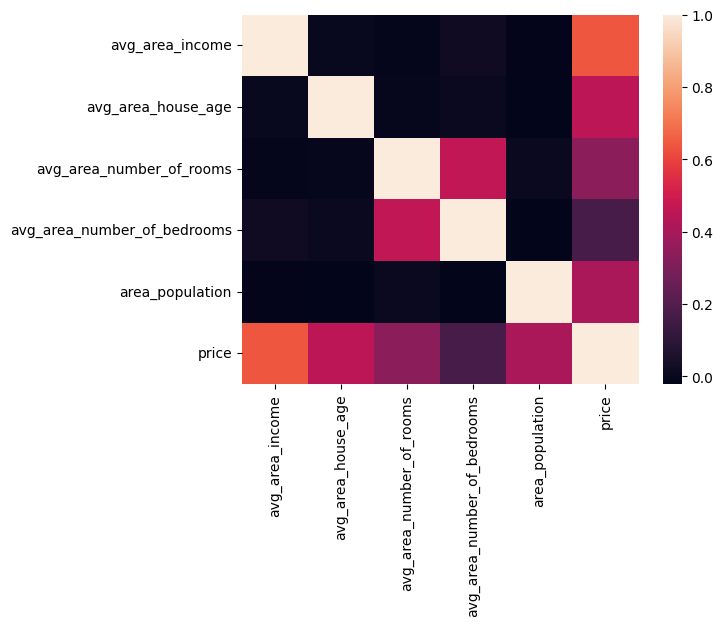

In [14]:
sns.heatmap(base_casa.corr())

<Axes: xlabel='price', ylabel='Count'>

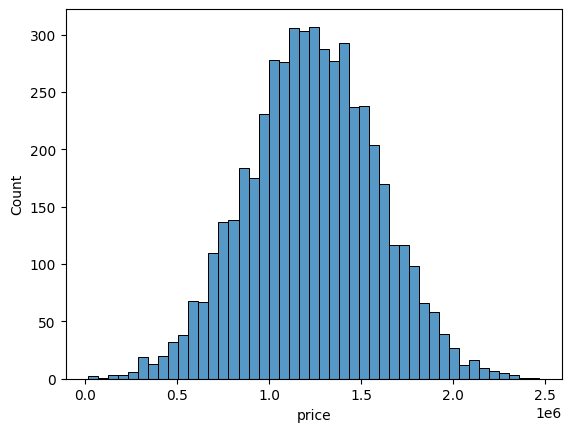

In [15]:
sns.histplot(base_casa['price'])

In [16]:
base_casa.columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population', 'price'],
      dtype='object')

In [17]:
X = base_casa[['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population']]
Y = base_casa['price']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42 )

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3500, 5)
(1500, 5)
(3500,)
(1500,)


In [20]:
#importando a biblioteca de regressão linear
from sklearn.linear_model import LinearRegression

In [21]:
#Declarando o modelo
lm = LinearRegression()

In [22]:
#treinando o modelo
lm.fit(X_train, Y_train)

LinearRegression()

In [23]:
# agora iremos tentar predizer os valores da base de teste de acordo com o modelo ajustado
Y_pred = lm.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
r = r2_score(Y_test, Y_pred)
print('O r² é: ',r)

O r² é:  0.914681849875402


Text(0, 0.5, 'Preço')

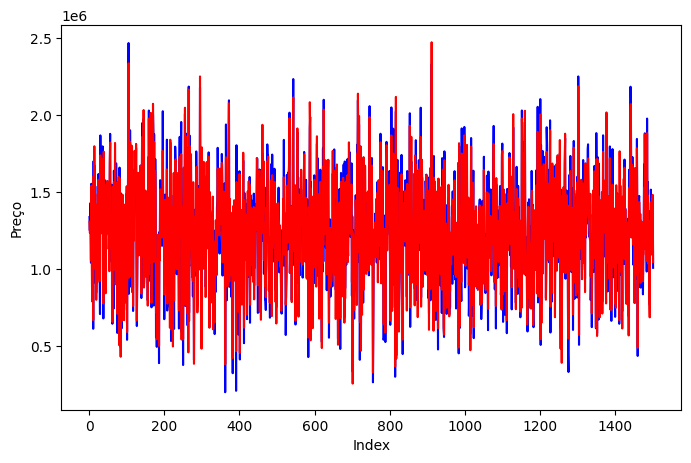

In [25]:
import matplotlib.pyplot as plt
c = [i for i in range(1,1501,1)]
fig = plt.figure(figsize=(8,5))
plt.plot(c, Y_test, color="blue")
plt.plot(c, Y_pred, color="Red")
plt.xlabel('Index')
plt.ylabel('Preço')


In [26]:
base_casa.head()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [27]:
# Fazendo uma previção

teste = base_casa.iloc[3:4] # Selecionando a 4ª linha do dataset
print(teste)
teste = teste.drop(['price'], axis=1) #removendo os dados de preço, pois é o que desejamos estimar.
previsao = lm.predict(teste) #calculando o valor predido sobre os dados da 4º linha
print(previsao) # valor predito
print(base_casa.iloc[3:4]['price'])

   avg_area_income  avg_area_house_age  avg_area_number_of_rooms  \
3     63345.240046            7.188236                  5.586729   

   avg_area_number_of_bedrooms  area_population         price  
3                         3.26     34310.242831  1.260617e+06  
[1120747.92259722]
3    1.260617e+06
Name: price, dtype: float64
